In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import neural_network

In [2]:
EPOCHS = 10

In [3]:
OCCUPATION = "../02_data/nn.csv"

In [4]:
data = pd.read_csv(OCCUPATION, header=None)

In [8]:
nn = neural_network.NeuralNetwork()

2023-01-22 19:20:35.215734: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-22 19:20:36.296247: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1621 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 860M, pci bus id: 0000:01:00.0, compute capability: 5.0


In [13]:
data = np.array(data.sample(frac=1.0))
#train_data = data[:int(len(data)*.7)]
#test_data = data[int(len(data)*.7)+1:]

In [14]:
history = nn.model.fit(data[:,:-1], data[:,-1], batch_size=1000, epochs=EPOCHS, validation_split=.3)
#eval_model = nn.model.evaluate(test_data[:,:-1], test_data[:,-1], batch_size=1000)

2023-01-22 19:22:12.626731: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 710062080 exceeds 10% of free system memory.
2023-01-22 19:22:13.121014: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 710062080 exceeds 10% of free system memory.


Epoch 1/10
1387/1387 [==============================] - 8s 5ms/step - loss: 0.1573 - val_loss: 0.0726
Epoch 2/10
1387/1387 [==============================] - 6s 5ms/step - loss: 0.0732 - val_loss: 0.0679
Epoch 3/10
1387/1387 [==============================] - 6s 5ms/step - loss: 0.0660 - val_loss: 0.0700
Epoch 4/10
1387/1387 [==============================] - 6s 5ms/step - loss: 0.0628 - val_loss: 0.0607
Epoch 5/10
1387/1387 [==============================] - 6s 5ms/step - loss: 0.0608 - val_loss: 0.0563
Epoch 6/10
1387/1387 [==============================] - 6s 5ms/step - loss: 0.0597 - val_loss: 0.0579
Epoch 7/10
1387/1387 [==============================] - 6s 5ms/step - loss: 0.0589 - val_loss: 0.0650
Epoch 8/10
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0582 - val_loss: 0.0601
Epoch 9/10
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0573 - val_loss: 0.0577
Epoch 10/10
1387/1387 [==============================] - 6s 5ms/step - loss: 0.057

In [15]:
history.history

{'loss': [0.15727250277996063,
  0.07322260737419128,
  0.06597868353128433,
  0.06275423616170883,
  0.06083603948354721,
  0.05967250466346741,
  0.05890494957566261,
  0.058226801455020905,
  0.057307783514261246,
  0.05695771425962448],
 'val_loss': [0.07256563752889633,
  0.06792419403791428,
  0.07001867145299911,
  0.06068069860339165,
  0.05632872134447098,
  0.057888492941856384,
  0.06504248827695847,
  0.060146115720272064,
  0.05767711251974106,
  0.0573289580643177]}

## **Testing**

In [17]:
RAW_OCCUPATION = "../02_data/occupancies.csv"

In [18]:
raw_df = pd.read_csv(RAW_OCCUPATION)

min_t = min(raw_df["timestamp"])
max_t = max(raw_df["timestamp"])

std = np.std(raw_df["counts"])
mean = np.mean(raw_df["counts"])

In [30]:
def standardize(x, mean, std):
    return (x-mean)/std

def de_standardize(y, mean, std):
    return y*std+mean

def normalize(x, min_d, max_d):
    return (x-min_d)/(max_d-min_d)

In [31]:
raw_df["ids"].unique()

array([1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069,
       1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080,
       1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091,
       1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102,
       1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124,
       1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135,
       1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146,
       1147, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158,
       1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169,
       1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180,
       1181, 1182, 1183, 1184, 1185, 1186])

In [37]:
PARKING_ID = 1115

In [38]:
import matplotlib.pyplot as plt

In [39]:
id_list = list(raw_df.ids.unique())

test_t = np.arange(14400, 50400, 60)
test_t = normalize(test_t, min_t, max_t)

id_encoding = np.zeros((len(test_t), len(id_list)))
for i in range(len(test_t)):
    id_encoding[i, id_list.index(PARKING_ID)] = 1.0

output = nn.model.predict(np.hstack([id_encoding, test_t.reshape(len(test_t), 1)]))
output = de_standardize(output, mean, std)

19/19 [==============================] - 0s 2ms/step


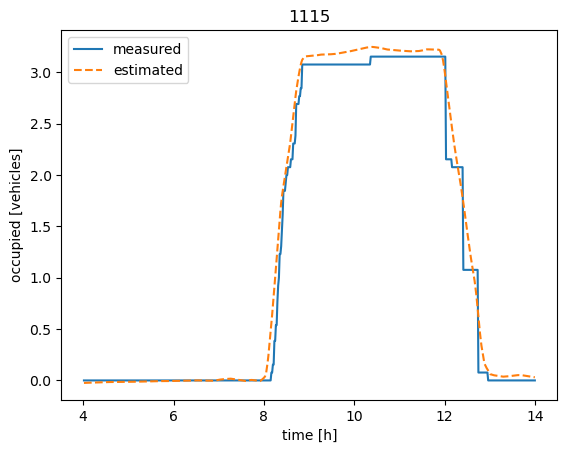

In [43]:
p_lot = raw_df[raw_df["ids"] == PARKING_ID]
p_lot_occup = p_lot.groupby("timestamp")["counts"].mean()
plt.plot(p_lot_occup.index/(60*60), p_lot_occup, label="measured")
plt.plot(p_lot_occup.index/(60*60), output, "--", label="estimated")
plt.xlabel("time [h]")
plt.ylabel("occupied [vehicles]")
plt.legend()
plt.title(PARKING_ID)
plt.show()